<a href="https://colab.research.google.com/github/tariq698/Product_Analysis/blob/main/Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/Order.xlsx')
df1 = pd.read_excel('/content/customer.xlsx')
df2 = pd.read_excel('/content/product.xlsx')

In [ ]:
df.head()

,Order_id,date,customer_id,product_id,quantity
0,1236,2024-01-01,74,148.0,13
1,1428,2024-01-01,54,149.0,1
2,1585,2024-01-01,71,248.0,3
3,1240,2024-01-02,56,242.0,15
4,1311,2024-01-03,79,299.0,18


In [ ]:
df1.head()

,customer_id,customer_name
0,74,Arjun
1,54,Priya
2,71,Liam
3,56,Emma
4,79,Ayaan


In [ ]:
df2.head()

,product_id,product_name,Price(Rs)
0,148,1. Apples,₹150
1,149,2. Bananas,₹40
2,248,3. Oranges,₹80
3,242,4. Grapes,₹200
4,299,5. Strawberries,₹300


In [ ]:
marge_df = pd.merge(df, df1, on='customer_id', how='left')

In [ ]:
merge_df = pd.merge(marge_df, df2, on='product_id', how='left')

In [ ]:
df = merge_df

In [ ]:
df.head()

,Order_id,date,customer_id,product_id,quantity,customer_name,product_name,Price(Rs)
0,1236,2024-01-01,74,148.0,13,Arjun,1. Apples,₹150
1,1428,2024-01-01,54,149.0,1,Priya,2. Bananas,₹40
2,1585,2024-01-01,71,248.0,3,Liam,3. Oranges,₹80
3,1240,2024-01-02,56,242.0,15,Emma,4. Grapes,₹200
4,1311,2024-01-03,79,299.0,18,Ayaan,5. Strawberries,₹300


In [ ]:
df.rename(columns={'Price(Rs)': 'Price'}, inplace=True)

In [ ]:
df.head()

,Order_id,date,customer_id,product_id,quantity,customer_name,product_name,Price
0,1236,2024-01-01,74,148.0,13,Arjun,1. Apples,₹150
1,1428,2024-01-01,54,149.0,1,Priya,2. Bananas,₹40
2,1585,2024-01-01,71,248.0,3,Liam,3. Oranges,₹80
3,1240,2024-01-02,56,242.0,15,Emma,4. Grapes,₹200
4,1311,2024-01-03,79,299.0,18,Ayaan,5. Strawberries,₹300


In [ ]:
df['Price'] = df['Price'].str.replace('₹', '').astype(float)

In [ ]:
import re

In [ ]:
df['product_name'] = df['product_name'].apply(lambda x: re.sub(r'^\d+\.\s*', '', str(x)) if isinstance(x, str) else str(x))

In [ ]:
df.head()

,Order_id,date,customer_id,product_id,quantity,customer_name,product_name,Price
0,1236,2024-01-01,74,148.0,13,Arjun,Apples,150.0
1,1428,2024-01-01,54,149.0,1,Priya,Bananas,40.0
2,1585,2024-01-01,71,248.0,3,Liam,Oranges,80.0
3,1240,2024-01-02,56,242.0,15,Emma,Grapes,200.0
4,1311,2024-01-03,79,299.0,18,Ayaan,Strawberries,300.0


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df.describe()

,Order_id,date,customer_id,product_id,Price,year,month,day
count,310.000000,310,310.000000,310.000000,295.000000,310.0,310.000000,310.000000
mean,1359.441935,2024-03-08 13:46:50.322580736,54.293548,205.090131,9.111864,2024.0,2.774194,14.800000
min,1111.000000,2024-01-01 00:00:00,10.000000,116.000000,1.000000,2024.0,1.000000,1.000000
25%,1231.250000,2024-02-05 00:00:00,32.000000,158.750000,3.000000,2024.0,2.000000,7.000000
50%,1366.500000,2024-03-06 00:00:00,55.000000,201.000000,9.000000,2024.0,3.000000,14.000000
75%,1482.500000,2024-04-10 00:00:00,74.000000,252.750000,15.000000,2024.0,4.000000,23.000000
max,1599.000000,2024-05-15 00:00:00,100.000000,299.000000,19.000000,2024.0,5.000000,31.000000
std,143.825344,NaN,26.077448,52.829795,6.112691,0.0,1.317290,8.991474


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_id       310 non-null    int64         
 1   date           310 non-null    datetime64[ns]
 2   customer_id    310 non-null    int64         
 3   product_id     310 non-null    float64       
 4   quantity       299 non-null    object        
 5   customer_name  310 non-null    object        
 6   product_name   310 non-null    object        
 7   Price          300 non-null    float64       
 8   year           310 non-null    int32         
 9   month          310 non-null    int32         
 10  day            310 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(3)
memory usage: 23.1+ KB


In [ ]:
df.isnull().sum()

,0
Order_id,0
date,0
customer_id,0
product_id,0
quantity,11
customer_name,0
product_name,0
Price,10
year,0
month,0


In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print("\nDataFrame after cleaning:")
print(df)

df['Price'] = df['Price'].astype(float)

print("\nDataFrame after converting to float:")
print(df)


DataFrame after cleaning:
     Order_id       date  customer_id  product_id quantity customer_name  \
0        1236 2024-01-01           74  148.000000       13         Arjun   
1        1428 2024-01-01           54  149.000000        1         Priya   
2        1585 2024-01-01           71  248.000000        3          Liam   
3        1240 2024-01-02           56  242.000000       15          Emma   
4        1311 2024-01-03           79  299.000000       18         Ayaan   
..        ...        ...          ...         ...      ...           ...   
305      1519 2024-05-13           79  205.399280       18         Ayaan   
306      1214 2024-05-13           98  205.409748       18           Ava   
307      1161 2024-05-14           53  205.420216       11          Isha   
308      1507 2024-05-15           65  205.430684        2        Daniel   
309      1424 2024-05-15           77  205.441152        3       Michael   

     product_name  Price  year  month  day  
0          Appl

In [ ]:
df['Price'] = df['Price'].fillna(df['Price'].mean)

In [ ]:
df['Price'].isnull().sum()

0

In [ ]:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

print("\nDataFrame after cleaning:")
print(df)

df['quantity'] = df['quantity'].fillna(0).astype(int)

print("\nDataFrame after converting to int:")
print(df)


DataFrame after cleaning:
     Order_id       date  customer_id  product_id  quantity customer_name  \
0        1236 2024-01-01           74  148.000000      13.0         Arjun   
1        1428 2024-01-01           54  149.000000       1.0         Priya   
2        1585 2024-01-01           71  248.000000       3.0          Liam   
3        1240 2024-01-02           56  242.000000      15.0          Emma   
4        1311 2024-01-03           79  299.000000      18.0         Ayaan   
..        ...        ...          ...         ...       ...           ...   
305      1519 2024-05-13           79  205.399280      18.0         Ayaan   
306      1214 2024-05-13           98  205.409748      18.0           Ava   
307      1161 2024-05-14           53  205.420216      11.0          Isha   
308      1507 2024-05-15           65  205.430684       2.0        Daniel   
309      1424 2024-05-15           77  205.441152       3.0       Michael   

     product_name  Price  year  month  day  
0  

In [ ]:
df['quantity'] = df['quantity'].fillna(df['quantity'].mean)

In [ ]:
df['quantity'].isnull().sum()

0

In [ ]:
df['quantity'].describe()

,quantity
count,310.000000
mean,8.670968
std,6.275869
min,0.000000
25%,2.000000
50%,8.000000
75%,14.750000
max,19.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,Order_id,date,customer_id,product_id,quantity,customer_name,product_name,Price,year,month,day
0,1236,2024-01-01,74,148.0,13,Arjun,Apples,13.0,2024,1,1
1,1428,2024-01-01,54,149.0,1,Priya,Bananas,1.0,2024,1,1
2,1585,2024-01-01,71,248.0,3,Liam,Oranges,3.0,2024,1,1
3,1240,2024-01-02,56,242.0,15,Emma,Grapes,15.0,2024,1,2
4,1311,2024-01-03,79,299.0,18,Ayaan,Strawberries,18.0,2024,1,3


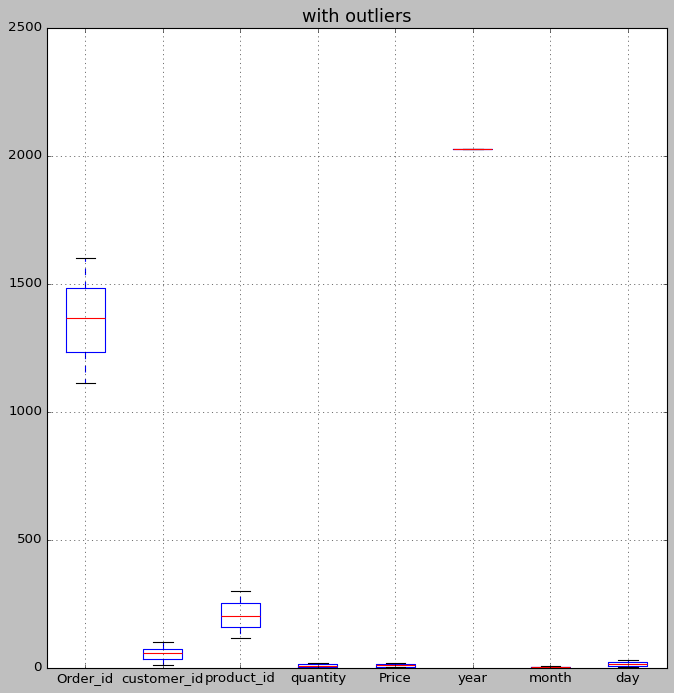

In [ ]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=6)
plt.title('with outliers',fontsize=16)
plt.show()

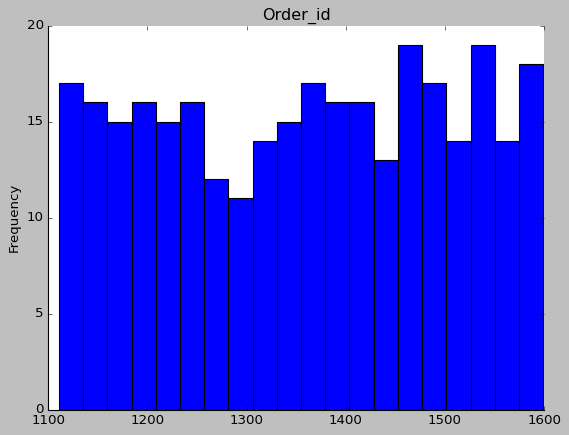

In [ ]:
from matplotlib import pyplot as plt
df['Order_id'].plot(kind='hist', bins=20, title='Order_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

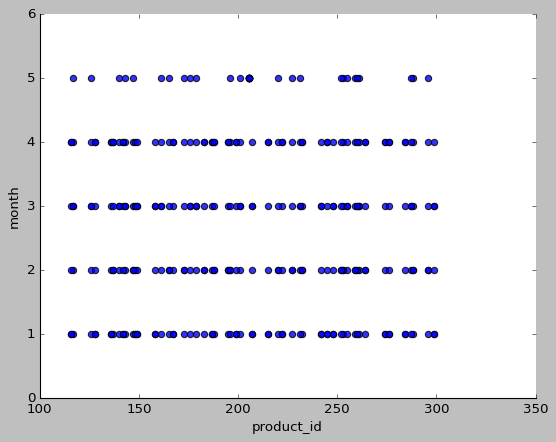

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='product_id', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

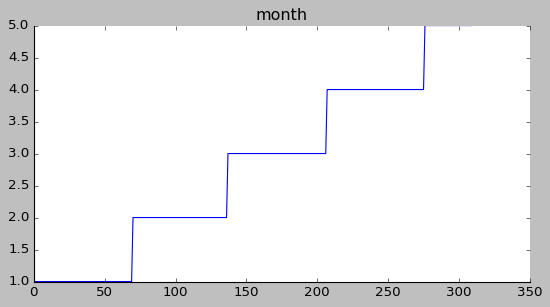

In [ ]:
# @title month

from matplotlib import pyplot as plt
df['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>